Q1

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd

# Load the penguins dataset from seaborn
penguins = sns.load_dataset('penguins')

# Create a histogram for each species
fig = go.Figure()

species_list = penguins['species'].dropna().unique()

for species in species_list:
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistics
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    std_dev = species_data['flipper_length_mm'].std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    
    # Add histogram
    fig.add_trace(go.Histogram(x=species_data['flipper_length_mm'], name=species, opacity=0.5))

    # Add mean and median lines
    fig.add_vline(mean, line_dash='dash', line_color='blue', annotation_text=f'{species} Mean', annotation_position='top right')
    fig.add_vline(median, line_dash='dash', line_color='red', annotation_text=f'{species} Median', annotation_position='top right')

    # Add range as a rectangle
    fig.add_hrect(y0=0, y1=1, x0=min_val, x1=max_val, fillcolor='green', opacity=0.2, annotation_text=f'{species} Range', annotation_position='top right')

    # Add interquartile range as a rectangle
    fig.add_hrect(y0=0, y1=1, x0=q1, x1=q3, fillcolor='orange', opacity=0.4, annotation_text=f'{species} IQR', annotation_position='top right')

    # Add standard deviation range as a rectangle
    fig.add_hrect(y0=0, y1=1, x0=lower_bound, x1=upper_bound, fillcolor='purple', opacity=0.3, annotation_text=f'{species} ±2 Std Dev', annotation_position='top right')

# Update layout
fig.update_layout(barmode='overlay', title='Flipper Length Distribution by Species', xaxis_title='Flipper Length (mm)', yaxis_title='Count')
fig.show()

https://chatgpt.com/share/66f0e0c3-8fe0-8006-8286-859b5e6c4524

In [ ]:
Q2

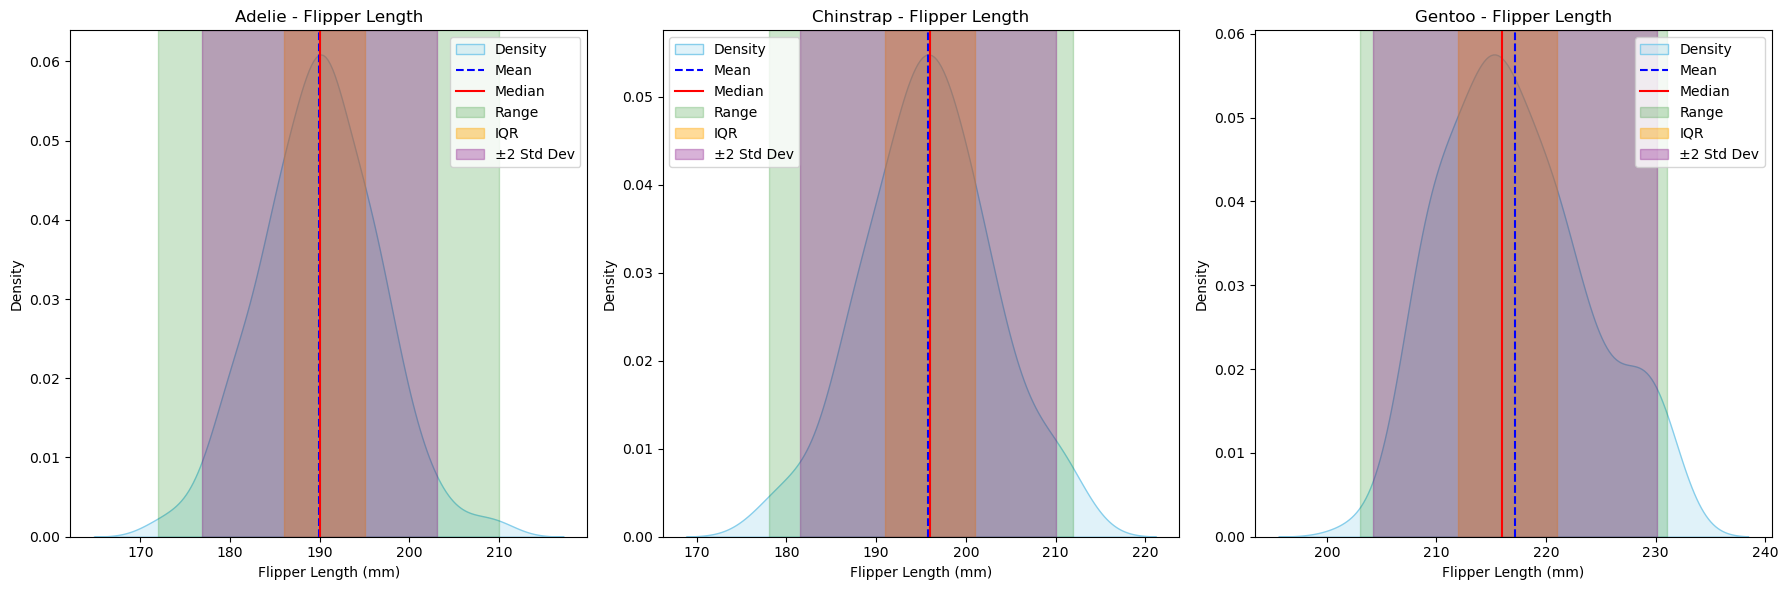

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset from seaborn
penguins = sns.load_dataset('penguins')

# Create a figure with three subplots in a row (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Get unique species list
species_list = penguins['species'].dropna().unique()

# Loop through each species and plot the KDE
for i, species in enumerate(species_list):
    # Filter the data for the current species
    species_data = penguins[penguins['species'] == species]
    flipper_lengths = species_data['flipper_length_mm'].dropna()

    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    min_val = flipper_lengths.min()
    max_val = flipper_lengths.max()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    std_dev = flipper_lengths.std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Plot KDE
    sns.kdeplot(flipper_lengths, ax=axes[i], fill=True, label='Density', color='skyblue')

    # Plot mean and median as vertical lines
    axes[i].axvline(mean, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median, color='red', linestyle='-', label='Median')

    # Plot range, IQR, and ±2 Std Dev as shaded regions
    axes[i].axvspan(min_val, max_val, color='green', alpha=0.2, label='Range')
    axes[i].axvspan(q1, q3, color='orange', alpha=0.4, label='IQR')
    axes[i].axvspan(lower_bound, upper_bound, color='purple', alpha=0.3, label='±2 Std Dev')

    # Set plot titles and labels
    axes[i].set_title(f"{species} - Flipper Length")
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


https://chatgpt.com/share/66f0e0c3-8fe0-8006-8286-859b5e6c4524

Q3

my idea:

1. Box Plots: A box plot is a graphical representation of data distribution that shows five key statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.

2. Histograms: A histogram is a type of bar chart that groups data into intervals (bins). And the height displays the frequency or density of data points in each bin.

3. Kernel Density Estimators (KDE): KDE is smoother than a histogram and provides a clearer visual representation of the underlying distribution.

reply:
Yes, I agree with you!

1. **Box Plots**: As you mentioned, they are excellent for displaying key summary statistics (minimum, Q1, median, Q3, and maximum) and are particularly useful for detecting outliers and understanding the data’s spread and symmetry.
   
2. **Histograms**: They effectively show the frequency distribution of data across defined intervals or "bins," providing insight into the shape of the distribution (e.g., skewness, modality). The larger the bin size, the more general the distribution appears.

3. **Kernel Density Estimators (KDE)**: They offer a smoother and more continuous alternative to histograms by estimating the probability density function of the data, allowing for a clearer understanding of the underlying distribution. KDEs are less affected by bin size choice, which can sometimes be a limitation with histograms.

These three visualizations complement each other well, offering different perspectives on the data.

Here’s a "pros and cons" list for box plots, histograms, and kernel density estimators (KDE):

### Box Plots

**Pros:**
- **Summary Statistics**: Clearly displays five key statistics (min, Q1, median, Q3, max).
- **Outlier Detection**: Effectively identifies outliers and extreme values.
- **Comparison**: Easily compare distributions across multiple groups.
- **Space-Efficient**: Requires less space compared to detailed plots.

**Cons:**
- **Limited Detail**: Does not show the underlying data distribution in detail; may obscure variations within quartiles.
- **Not Suitable for Small Samples**: Can be misleading with very small datasets.
- **Less Informative for Multimodal Data**: Does not reveal if the data has multiple modes.

### Histograms

**Pros:**
- **Frequency Visualization**: Clearly shows the distribution of data across intervals (bins).
- **Simple to Understand**: Intuitive and easy to interpret for most audiences.
- **Useful for Large Datasets**: Effective for summarizing large amounts of data.

**Cons:**
- **Bin Size Sensitivity**: The choice of bin size can significantly affect the appearance of the distribution.
- **Less Smooth**: Can appear jagged, making it harder to see the overall distribution shape.
- **Overlapping Data**: Not ideal for visualizing multiple distributions in one plot without adding complexity.

### Kernel Density Estimators (KDE)

**Pros:**
- **Smoother Representation**: Provides a smooth curve that represents the data distribution, making patterns easier to see.
- **Continuous Density Function**: Offers a better estimation of the underlying distribution compared to histograms.
- **Less Sensitive to Binning**: Not affected by bin size choice, resulting in more consistent representations.

**Cons:**
- **Bandwidth Sensitivity**: The choice of bandwidth can significantly affect the smoothness of the curve; poor choice can hide important features or create noise.
- **Less Intuitive for Some**: May be less familiar to some audiences compared to histograms or box plots.
- **Not Suitable for Small Samples**: Can be misleading when used with very small datasets.

These pros and cons can help determine which visualization is most appropriate based on the specific context and characteristics of the data you are working with.

I like histograms because they’re easy to read and show how data is distributed. They help spot trends and outliers, making them great for analyzing large datasets. Plus, they look nice and make comparisons simple.

https://chatgpt.com/share/66f0e0c3-8fe0-8006-8286-859b5e6c4524

Q4

In [6]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
mean_A = np.mean(data1)
var_A = np.var(data1)

mean_B = np.mean(data2)
var_B = np.var(data2)

mean_C = np.mean(data3)
var_C = np.var(data3)

mean_D = np.mean(data4)
var_D = np.var(data4)

print(f"Dataset A: Mean = {mean_A}, Variance = {var_A}")
print(f"Dataset B: Mean = {mean_B}, Variance = {var_B}")
print(f"Dataset C: Mean = {mean_C}, Variance = {var_C}")
print(f"Dataset D: Mean = {mean_D}, Variance = {var_D}")


Dataset A: Mean = 5.040032208334544, Variance = 8.264450829442618
Dataset B: Mean = 4.975974765252992, Variance = 2.139499566518657
Dataset C: Mean = 4.984776590445955, Variance = 9.119053671456887
Dataset D: Mean = 5.97854067788321, Variance = 0.2464625413326151


1. A and C
2. A and B, B and C
3. B and D
4. A and D, C and D

Q5

The relationship between the **mean** and **median** is closely tied to the **skewness** of a distribution, which describes its asymmetry. Here’s a breakdown of the general relationship:

### 1. **Right Skewness (Positive Skewness)**:
   - **Description**: The tail on the right side of the distribution is longer or fatter. Most of the data is concentrated on the left.
   - **Mean vs. Median**:
     - In a right-skewed distribution, the **mean** is **greater** than the **median**.
   - **Why?**: The mean is affected by extreme values (outliers). In right-skewed data, large outliers on the right pull the mean to the right, making it larger than the median, which is less sensitive to extreme values.
     - **Example**: Incomes of a population where a few very high earners (outliers) push the mean higher than the median.

### 2. **Left Skewness (Negative Skewness)**:
   - **Description**: The tail on the left side of the distribution is longer or fatter. Most of the data is concentrated on the right.
   - **Mean vs. Median**:
     - In a left-skewed distribution, the **mean** is **less** than the **median**.
   - **Why?**: Outliers on the left side (low extreme values) pull the mean downward, while the median remains more central in the bulk of the data.
     - **Example**: Test scores where most students perform well, but a few very low scores pull the mean lower than the median.

### 3. **Symmetric Distribution (No Skewness)**:
   - **Description**: The left and right sides of the distribution are mirror images of each other.
   - **Mean vs. Median**:
     - In a symmetric distribution, the **mean** and **median** are approximately **equal**.
   - **Why?**: Without skewness, the data is evenly spread, and the mean and median will be close or the same.

### Summary:
- **Right skewed**: Mean > Median.
- **Left skewed**: Mean < Median.
- **Symmetric**: Mean ≈ Median.

This difference arises because the **mean** is sensitive to **extreme values** or **outliers**, while the **median** is more **robust** and only reflects the midpoint of the data, regardless of the extremes.

In a right-skewed distribution, the mean is higher than the median because extreme high values pull the mean up. In a left-skewed distribution, the mean is lower than the median because extreme low values drag the mean down.

Here's a summary of how the code works:

1. **Imports**: The code uses `scipy` for generating random samples from a Gamma distribution, `pandas` for data manipulation, and `numpy` for numerical operations.

2. **Right-Skewed Sample Generation**:
   - The first dataset `sample1` is created using a Gamma distribution with `a=2` and `scale=2`. It generates 1,000 random samples.
   
3. **Plotting**: A histogram is created using Plotly Express (`px.histogram`) to visualize `sample1`. The plot is rendered as a PNG image.

4. **Calculations**:
   - The **mean** of `sample1` is computed using `.mean()`.
   - The **median** is computed using `np.quantile()` with a quantile of `0.5`.

5. **Left-Skewed Sample**:
   - A second dataset `sample2` is created by negating `sample1`, producing a left-skewed distribution.

This code demonstrates how to create skewed data distributions, plot them, and compute central tendency measures (mean and median) to illustrate the effect of skewness on these measures.

https://chatgpt.com/share/66f218ec-5f14-8006-990c-45de340c2b8b

Q6

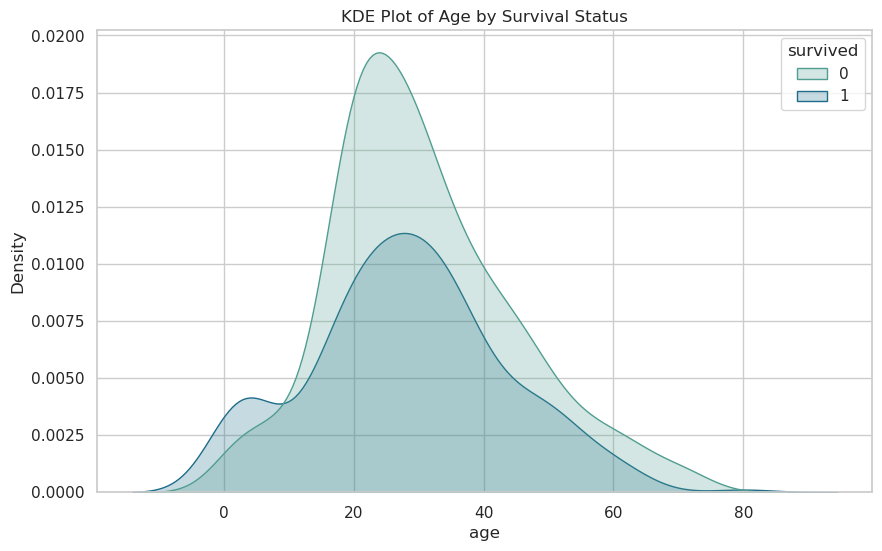

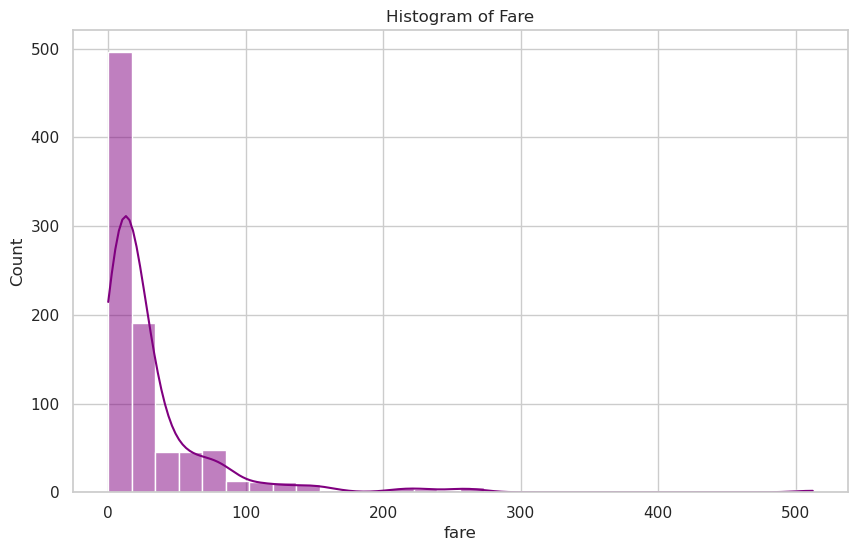

/tmp/ipykernel_53/494792338.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic, x="class", y="fare", palette="Set3")


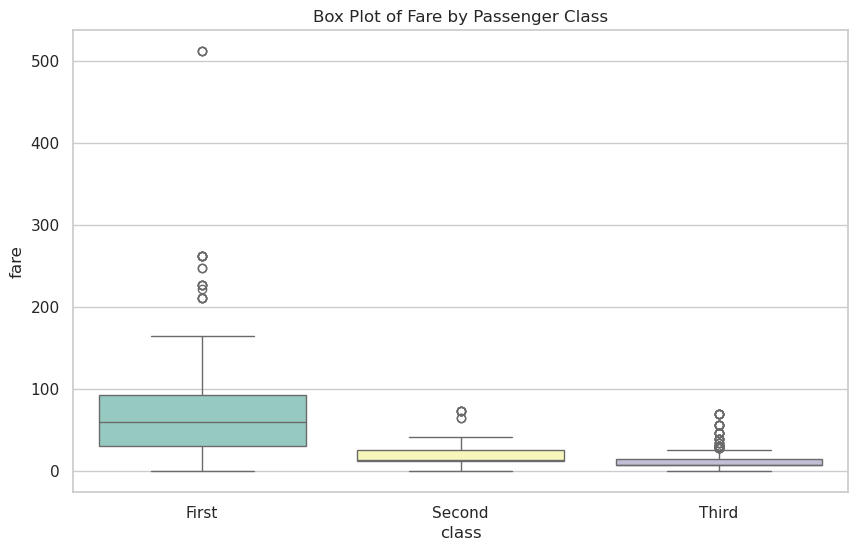

In [3]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Set a consistent Seaborn style
sns.set(style="whitegrid")

# KDE Plot: Age distribution by survival status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic, x="age", hue="survived", fill=True, palette="crest")
plt.title('KDE Plot of Age by Survival Status')
plt.show()

# Histogram: Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic['fare'], bins=30, kde=True, color='purple')
plt.title('Histogram of Fare')
plt.show()

# Box Plot: Comparing Fare by Passenger Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, x="class", y="fare", palette="Set3")
plt.title('Box Plot of Fare by Passenger Class')
plt.show()


https://chatgpt.com/share/66f21c50-d678-8006-a6a9-53f8dcb16ffa

Q7

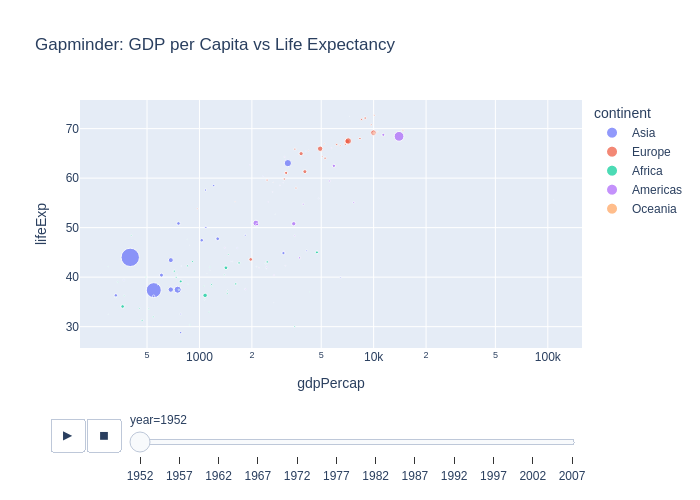

In [14]:
import pandas as pd
import plotly.express as px

# Load the Gapminder dataset
gapminder = px.data.gapminder()

# Create the animated scatter plot
fig_gapminder = px.scatter(
    gapminder,
    x="gdpPercap", 
    y="lifeExp", 
    size="pop", 
    color="continent", 
    animation_frame="year", 
    hover_name="country", 
    log_x=True, 
    title="Gapminder: GDP per Capita vs Life Expectancy"
)

fig_gapminder.show(renderer="png")  # Use PNG renderer for GitHub and MarkUs submissions


https://chatgpt.com/share/66f220a3-7cdc-8006-8788-5d09d7675c73

Q8

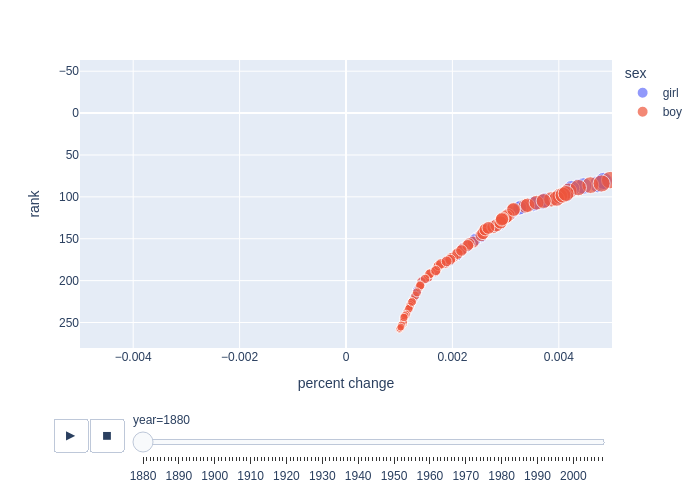

In [15]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name'] + " " + bn['sex']  # Distinguish identical boy and girl names
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Calculate the increase or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # Restrict to "common" names

# Create the animated scatter plot
fig_baby_names = px.scatter(
    bn,
    x="percent change", 
    y="rank", 
    size="percent", 
    color="sex", 
    animation_frame="year", 
    animation_group="name", 
    hover_name="name",
    size_max=50,
    range_x=[-0.005, 0.005]  # Set x-axis range
)

fig_baby_names.update_yaxes(autorange='reversed')  # Reverse the y-axis to put rank 1 at the top
fig_baby_names.show(renderer="png")  # Use PNG renderer for GitHub and MarkUs submissions


https://chatgpt.com/share/66f220a3-7cdc-8006-8788-5d09d7675c73

Q9

In [ ]:
yes